# Inspecting Equations

For a user who has developed a partial differential equation using `sympy`, or a set of PDEs, it is often desireable to know certain information about those equations. What functions are differentiated?  What variables are derivatives taken with respect to?  Do functions or symbols appear that are not involved in differentiation?

The `regen` module needs to know the answers to these questions, e.g. when performing an automated integration by parts, and so there are some functions within the module that perform these inspections:

    inspect_eqn(eq)
    inspect_eqns(eq1, eq2, ...)

These functions return a dictionary with certain keys, such as `"symbols"`, `"differentiated functions"`, etc., and whose values are tuples of `sympy` objects.

We will need some classes and functions from the `sympy` module, as well as the `regen` module:

In [1]:
from sympy import Symbol, Function, Derivative, Eq
from sympy import init_printing
init_printing()
import regen

Let's create a simple 2D PDE,

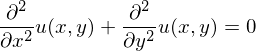

In [2]:
x = Symbol("x")
y = Symbol("y")
u = Function("u")(x,y)
pde = Eq(Derivative(u,x,2) + Derivative(u,y,2), 0)
pde

and inspect it:

In [3]:
regen.inspect_eqn(pde)

{'symbols': (),
 'functions': (),
 'differentiated functions': (u(x, y),),
 'differentiating variables': (y, x),
 'domain variables': (y, x)}

The differentiated function is `u(x, y)` and the differentiating variables are `x` and `y`.  The domain variables are also `x` and `y`, but these data sets have different meanings.  The `"differentiating variables"` is the set of variables that derivatives are taken with respect to.  The `"domain variables"` is the set of variables that serve as arguments to functions.  Often, these should be the same, and checking that they are could be a sanity check.

From the inspection, we see that there are no symbols or functions outside the ones involved in derivatives.

Now let's look at a more complicated situation: a set of two 2D PDEs with symbols and functions that are not involved in the derivatives:

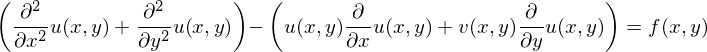

In [4]:
v    = Function("v")(x,y)
f    = Function("f")(x,y)
rho  = Symbol("ρ")
mu   = Symbol("μ")
ns_x = Eq(mu*(Derivative(u,x,2) + Derivative(u,y,2)) - rho*(u*Derivative(u,x) + v*Derivative(u,y)), f)
ns_y = Eq(mu*(Derivative(v,x,2) + Derivative(v,y,2)) - rho*(u*Derivative(v,x) + v*Derivative(v,y)), f)

ns_x

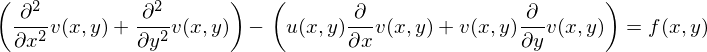

In [5]:
ns_y

In [6]:
regen.inspect_eqns(ns_x, ns_y)

{'symbols': (μ, ρ),
 'functions': (f(x, y),),
 'differentiated functions': (v(x, y), u(x, y)),
 'differentiating variables': (y, x),
 'domain variables': (y, x)}

Note that if we were to inspect just one of the equations, say `ns_x`, the result would be

In [7]:
insp_x = regen.inspect_eqn(ns_x)
insp_x

{'symbols': (μ, ρ),
 'functions': (v(x, y), f(x, y)),
 'differentiated functions': (u(x, y),),
 'differentiating variables': (y, x),
 'domain variables': (y, x)}

and that `v(x, y)` would be interpreted as an undifferentiated function, which is not correct when interpreting the set as a whole. It is possible to inspect individual equations and combine them later:

In [8]:
insp_y = regen.inspect_eqn(ns_y)
regen.combine_inspections(insp_x, insp_y)

{'symbols': (μ, ρ),
 'functions': (f(x, y),),
 'differentiated functions': (v(x, y), u(x, y)),
 'differentiating variables': (y, x),
 'domain variables': (y, x)}